#Naive Bayes Implementation Through SKlearn

#Loading Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import math

#Loading dataset

In [ ]:
df = pd.read_csv("Data.csv",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [ ]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS'] 

#Standardize the Variables

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463


#Splitting data into train, test and cross validation set

In [ ]:
X = scaled_features
y = df['TARGET CLASS']

X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.2)

print('Total number of datapoints in the dataset:',X.shape[0])

print('Number of datapoints in Training data: {}({:.2f}%)'.
      format(X_tr.shape[0],(X_tr.shape[0]/X.shape[0])*100))

print('Number of datapoints in Cross Validation data: {}({:.2f}%)'.
      format(X_cv.shape[0],(X_cv.shape[0]/X.shape[0])*100))

print('Number of datapoints in Test Data: {}({:.2f}%)'.
      format(X_test.shape[0],(X_test.shape[0]/X.shape[0])*100))

Total number of datapoints in the dataset: 1000
Number of datapoints in Training data: 560(56.00%)
Number of datapoints in Cross Validation data: 140(14.00%)
Number of datapoints in Test Data: 300(30.00%)


#Naive Bayes model building along with hyperparameter tuning for the optimal alpha, using AUC value

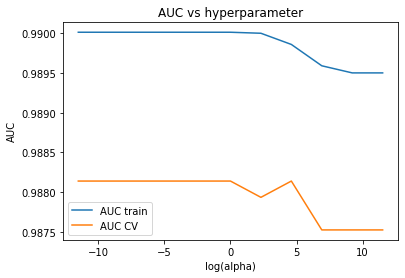

Optimal alpha for which auc is maximum :  -11.512925464970229


In [ ]:
auc_train=[]
auc_cv=[]
alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    
for i in alpha_values:
    mnb = MultinomialNB(alpha = i)
    mnb.fit(X_tr,y_tr)
    pred=mnb.predict_proba(X_cv)[:,1]
    pred1=mnb.predict_proba(X_tr)[:,1]
    auc_train.append(roc_auc_score(y_tr,pred1))
    auc_cv.append(roc_auc_score(y_cv,pred))
    
alpha_values=[math.log(x) for x in alpha_values] #since alpha_values vary from very small to
                                                 #very large values, we can use log of these
                                                 #values which will be helpful while plotting
                                                 #these values.

#Plotting AUC
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_values, auc_train, label='AUC train')
ax.plot(alpha_values, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
ax.legend()
plt.show()

optimal_alpha= alpha_values[auc_cv.index(max(auc_cv))]
print('Optimal alpha for which auc is maximum : ',optimal_alpha)

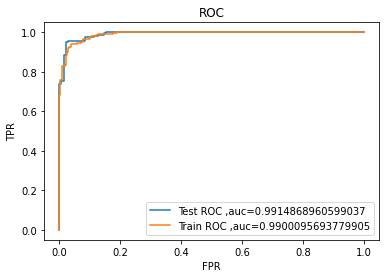

In [ ]:
#ROC for alpha = optimal_alpha

mnb=MultinomialNB(alpha = 1)
mnb.fit(X_tr,y_tr)
predi=mnb.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=mnb.predict_proba(X_tr)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_tr,pred)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_tr,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

#Evaluation metrics

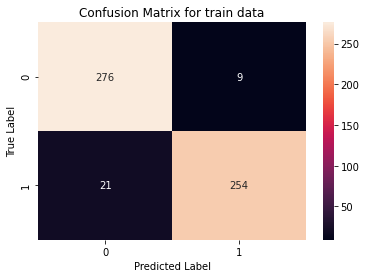



-------------------- Metric report for train data --------------------

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       285
           1       0.97      0.92      0.94       275

    accuracy                           0.95       560
   macro avg       0.95      0.95      0.95       560
weighted avg       0.95      0.95      0.95       560



In [ ]:
#Confusion matrix using heatmap for train data


mnb=MultinomialNB(alpha=1)
mnb.fit(X_tr,y_tr)
predic=mnb.predict(X_tr)

conf_mat = confusion_matrix(y_tr, predic)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print('\n')
print('-'*20,'Metric report for train data','-'*20)
print('\n',classification_report(y_tr,predic))

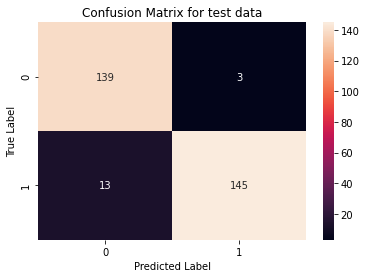



-------------------- Metric report for test data --------------------

               precision    recall  f1-score   support

           0       0.91      0.98      0.95       142
           1       0.98      0.92      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
#Confusion matrix using heatmap for test data

mnb=MultinomialNB(alpha=1)
mnb.fit(X_tr,y_tr)
predic_test=mnb.predict(X_test)

conf_mat = confusion_matrix(y_test, predic_test)
class_label = ["0", "1"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print('\n')
print('-'*20,'Metric report for test data','-'*20)
print('\n',classification_report(y_test,predic_test))